# Get the data

In [1]:
from pathlib import Path
import pandas as pd

In [2]:
titanic = pd.read_csv(Path("train.csv"))
test = pd.read_csv(Path("test.csv"))
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic = titanic.set_index("PassengerId")
test = test.set_index("PassengerId")

# Explore data to gain insights

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Just looking at the data, the cabin data can be dropped because of the high amount of NaN values
- PassengerID can be used as the unique identifier in this case, so name and ticket number can be discarded too

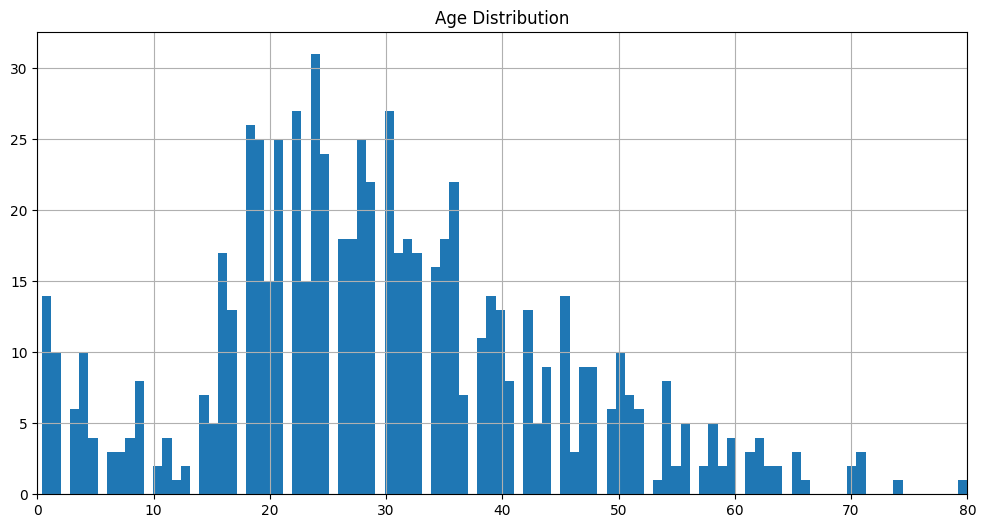

In [6]:
import matplotlib.pyplot as plt

titanic["Age"].hist(bins=100, figsize=(12,6))
plt.title("Age Distribution")
plt.xlim([0, max(titanic["Age"])])
plt.show()

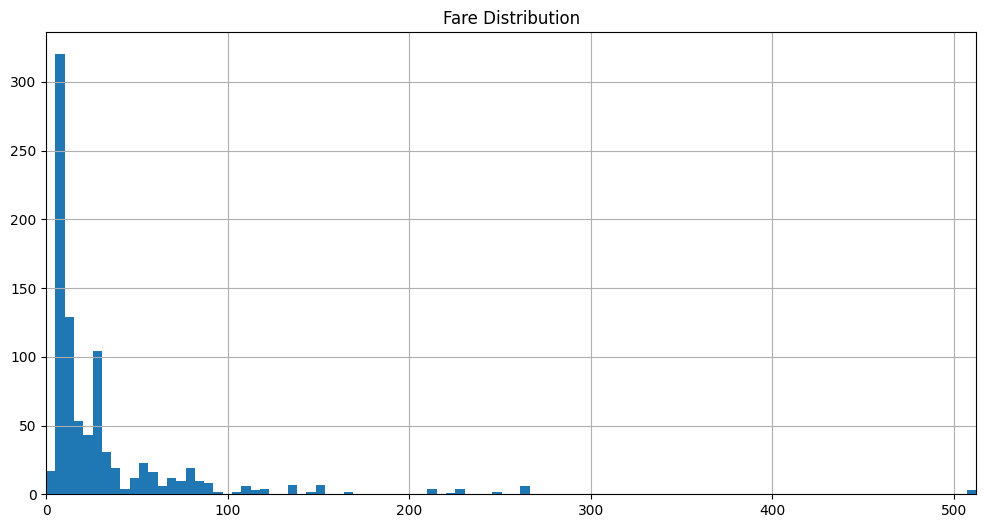

In [7]:
titanic["Fare"].hist(bins=100, figsize=(12,6))
plt.title("Fare Distribution")
plt.xlim([0, max(titanic["Fare"])])
plt.show()

- Gives a general idea of what the data looks like. Most of them are right tailed and need to be standardised to look like a distribution graph.
- Some are just categorical, which something else needs to be done with it. (Sex needs to be made into numbers, SipSp Parch, Pclass need to be OneHotEncoded)
- Some of the features need to be standardised such as the Fare and Age. 
- Most likely, the age, gender, and class are the biggest factors that contribute to surviving. 


In [8]:
from sklearn.model_selection import train_test_split

strat_train_set, strat_test_set = train_test_split(
    titanic,
    test_size=0.2,
    stratify=titanic["Sex"],
    random_state=42
)

In [9]:
titanic = strat_train_set.copy()

In [10]:
titanic["Sex"] = titanic["Sex"].replace(["male"], 0)
titanic["Sex"] = titanic["Sex"].replace(["female"], 1)

In [11]:
titanic.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,578.000000,712.000000,712.000000,712.000000
mean,0.389045,2.323034,0.352528,29.781436,0.546348,0.373596,31.282893
std,0.487876,0.838341,0.478093,14.628503,1.110283,0.803144,44.377233
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.456250
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.275000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
corr_matrix = titanic.corr(numeric_only=True)
corr_matrix["Survived"].sort_values(ascending=False) 

Survived    1.000000
Sex         0.550827
Fare        0.248255
Parch       0.059276
SibSp      -0.045019
Age        -0.075542
Pclass     -0.314577
Name: Survived, dtype: float64

- Can see that if you are older, you are less likely to survive
- If you have more family members, can mean that you are less likely to survive
- If you have parents, or if you have children, more likely to survive
- If you are a woman, more likely to survive

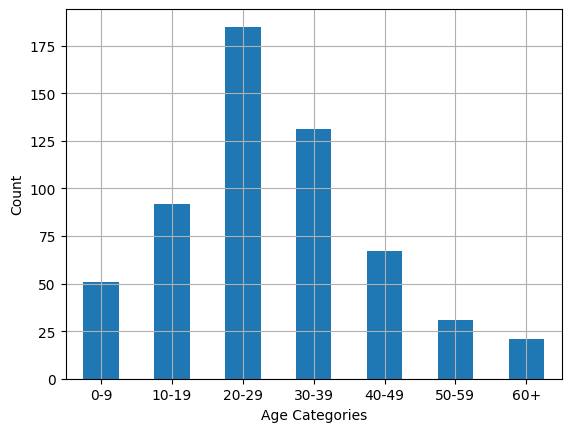

In [13]:
#Looking at age groups and how we can fill in the missing values. 
import numpy as np

titanic["age_cat"] = pd.cut(
    titanic["Age"],
    bins=[0, 10, 20, 30, 40, 50, 60, np.inf],
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60+"]
)

titanic["age_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Age Categories")
plt.ylabel("Count")
plt.show()

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_cat
PassengerId,,,,,,,,,,,,
789,1,3,"Dean, Master. Bertram Vere",0,1.0,1,2,C.A. 2315,20.5750,NaN,S,0-9
348,1,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",1,NaN,1,0,386525,16.1000,NaN,S,NaN
630,0,3,"O'Connell, Mr. Patrick D",0,NaN,0,0,334912,7.7333,NaN,Q,NaN
735,0,2,"Troupiansky, Mr. Moses Aaron",0,23.0,0,0,233639,13.0000,NaN,S,20-29
107,1,3,"Salkjelsvik, Miss. Anna Kristine",1,21.0,0,0,343120,7.6500,NaN,S,20-29


In [15]:
#Survival rate of different age catefories 
result_age = titanic.pivot_table('Survived', index=[titanic["age_cat"]])
result_age.index

CategoricalIndex(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+'], categories=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60+'], ordered=True, dtype='category', name='age_cat')

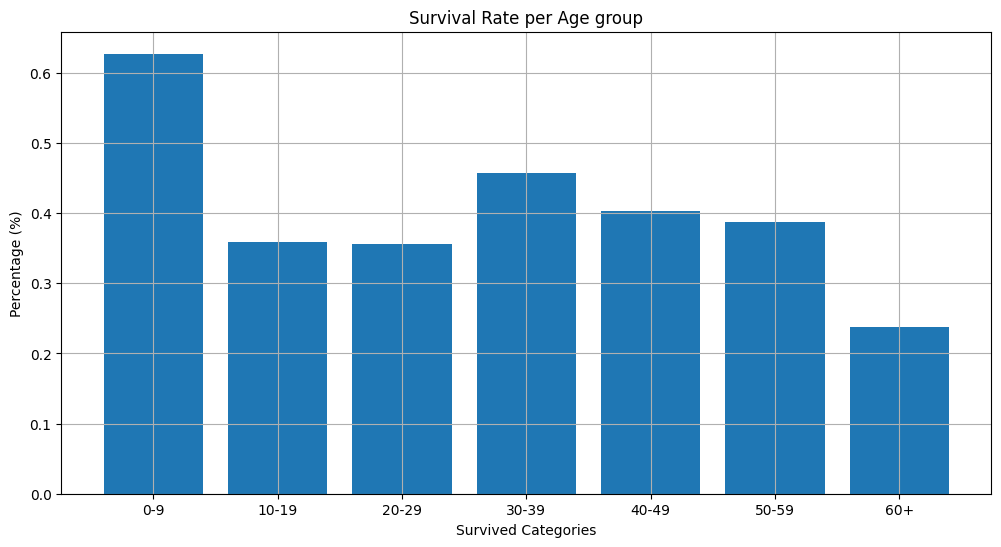

In [16]:
plt.rcParams["figure.figsize"] = (12,6)
plt.bar(result_age.index, height = result_age["Survived"])
plt.title("Survival Rate per Age group")
plt.grid()
plt.xlabel("Survived Categories")
plt.ylabel("Percentage (%)")
plt.show()

- Can see that the youngest age groups 9 and under have the highest survival rate. peaks at around 30-39. Could this be because the mothers are around this age? Would make sense but have to check. Check what percentage of each age class is male and female

In [17]:
result = titanic.pivot_table("Sex", index=[titanic["age_cat"]])
result #Per age class, actually a lot more men than women

,Sex
age_cat,
0-9,0.490196
10-19,0.380435
20-29,0.345946
30-39,0.351145
40-49,0.328358
50-59,0.290323
60+,0.142857


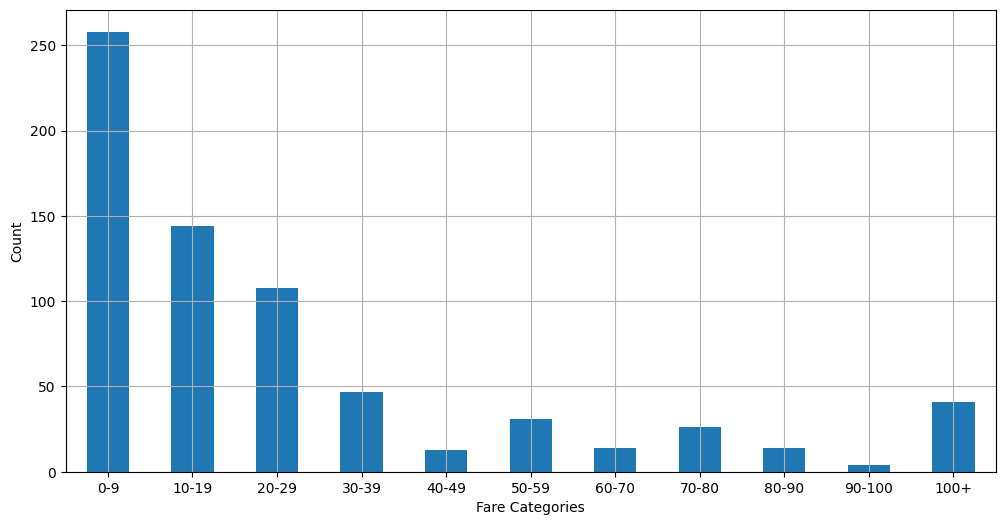

In [18]:
import numpy as np #Very right tailed, logarithmic should be used to normalise it

titanic["fare_cat"] = pd.cut(
    titanic["Fare"],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf],
    labels=["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-70", "70-80", "80-90", "90-100", "100+"]
)

titanic["fare_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Fare Categories")
plt.ylabel("Count")
plt.show()

- To impute age values, we can do it based on the age distibution and use it as the probability that they are a certain age (Must create your own transformer for this)

# Prepare data to expose underlying patterns for the machine learning algorithm

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.experimental import enable_iterative_imputer

In [20]:
from sklearn.impute import IterativeImputer

In [21]:
titanic = strat_train_set.drop(["Survived"], axis=1)
titanic_labels = strat_train_set["Survived"].copy()

In [22]:
titanic.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
789,3,"Dean, Master. Bertram Vere",male,1.0,1,2,C.A. 2315,20.5750,NaN,S
348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,NaN,1,0,386525,16.1000,NaN,S
630,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q
735,2,"Troupiansky, Mr. Moses Aaron",male,23.0,0,0,233639,13.0000,NaN,S
107,3,"Salkjelsvik, Miss. Anna Kristine",female,21.0,0,0,343120,7.6500,NaN,S


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 789 to 262
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       578 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     164 non-null    object 
 9   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 61.2+ KB


In [24]:
class dropcolumns(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.columns = None
    
    def fit(self, X, y=None):
        self.columns = X.columns
        return self
    
    def transform(self, X, y=None):
        return X.drop(columns=self.columns, axis=1)
    
    def get_feature_names_out(self, input_features=None):
        return [col for col in input_features if col not in self.columns]
        

In [25]:
cat_pipeline = make_pipeline(
    OrdinalEncoder(),
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

num_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
)

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(lambda x: np.log(x + 1), feature_names_out="one-to-one"),
    StandardScaler()
)

iterative_pipeline = make_pipeline(
    IterativeImputer(random_state=42),
    StandardScaler()
)

drop_pipeline = make_pipeline(
    dropcolumns()
)

def columns_add(X):
    return (X[:, 0] + X[:, 1]).reshape(-1, 1)

def add_name(function_transformer, feature_names_in):
    return ["family_members"]

add_pipeline = make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(columns_add, feature_names_out=add_name),
        StandardScaler())


preprocessing = ColumnTransformer([
    ("cat", cat_pipeline, ["Pclass", "Sex", "Embarked"]),
    ("add", add_pipeline, ["SibSp", "Parch"]),
    ("log", log_pipeline, ["Fare"]),
    ("iterative", iterative_pipeline, ["Age"]),
    ("drop", drop_pipeline, ["Name", "Ticket", "Cabin", "SibSp", "Parch"]),
],
remainder="passthrough")

In [26]:
titanic_prepared = preprocessing.fit_transform(titanic)

In [27]:
titanic_prepared.shape

(712, 11)

In [28]:
preprocessing.get_feature_names_out()

array(['cat__Pclass_0.0', 'cat__Pclass_1.0', 'cat__Pclass_2.0',
       'cat__Sex_0.0', 'cat__Sex_1.0', 'cat__Embarked_0.0',
       'cat__Embarked_1.0', 'cat__Embarked_2.0', 'add__family_members',
       'log__Fare', 'iterative__Age'], dtype=object)

In [29]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 789 to 262
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Name      712 non-null    object 
 2   Sex       712 non-null    object 
 3   Age       578 non-null    float64
 4   SibSp     712 non-null    int64  
 5   Parch     712 non-null    int64  
 6   Ticket    712 non-null    object 
 7   Fare      712 non-null    float64
 8   Cabin     164 non-null    object 
 9   Embarked  710 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 61.2+ KB


In [67]:
titanic_prepared_df = pd.DataFrame(titanic_prepared)

# Select and Train the Model (Classifiers)

- Requires a binary classifier to state if the person survives or not (0 or 1)
- Different Options
    - Stochastic Gradient Descent Classifier
    - Logistic Regression Classifier
    - Support Vector Machine Classifier
    - RandomForestClassifier
    - GradientBoostingClassifier

### Stochastic Gradient Descent Classifier

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_clf = make_pipeline(
    preprocessing,
    SGDClassifier(random_state=42)
)

sgd_clf.fit(titanic, titanic_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('add',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...
                                                                                       func=<function <lambda> at 0x1752560c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('iterative',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('drop',
                                                  Pipeline(steps=[('dropcolumns',
                                                                   dropcolumns())]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'SibSp', 'Parch'])])),
                ('sgdclassifier', SGDClassifier(random_state=42))])

In [31]:
from sklearn.model_selection import cross_val_score

sgd_cv = cross_val_score(sgd_clf, titanic, titanic_labels, cv=100, scoring="accuracy")
sgd_cv.mean()

0.7689285714285714

In [32]:
sgd_cv.std()

0.1453097500837014

In [33]:
from sklearn.model_selection import cross_val_predict

titanic_labels_pred_sgd = cross_val_predict(sgd_clf, titanic, titanic_labels, cv=100)
titanic_labels_scores_sgd = cross_val_predict(sgd_clf, titanic, titanic_labels, cv=100, method="decision_function")

In [34]:
from sklearn.metrics import f1_score

sgd_f1 = f1_score(titanic_labels, titanic_labels_pred_sgd)
sgd_f1

0.703971119133574

In [35]:
from sklearn.metrics import roc_auc_score
sgd_roc_auc = roc_auc_score(titanic_labels, titanic_labels_scores_sgd)
sgd_roc_auc

0.815361633262791

In [36]:
from sklearn.dummy import DummyClassifier

dummy_clf = make_pipeline(
    preprocessing, 
    DummyClassifier()
)

dummy_clf.fit(titanic, titanic_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('add',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...
                                                                                       func=<function <lambda> at 0x1752560c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('iterative',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('drop',
                                                  Pipeline(steps=[('dropcolumns',
                                                                   dropcolumns())]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'SibSp', 'Parch'])])),
                ('dummyclassifier', DummyClassifier())])

In [37]:
dummy_cv = cross_val_score(dummy_clf, titanic, titanic_labels, cv=100, scoring="accuracy")  
dummy_cv.mean()

0.6107142857142857

- Should be fine since the probability of success is not close to the dummy classifier accuracy

### Linear Regression Classifier

In [38]:
from sklearn.linear_model import LogisticRegression

lr_clf = make_pipeline(
    preprocessing,
    LogisticRegression(random_state=42)
)

lr_clf.fit(titanic, titanic_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('add',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...
                                                                                       func=<function <lambda> at 0x1752560c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('iterative',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('drop',
                                                  Pipeline(steps=[('dropcolumns',
                                                                   dropcolumns())]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'SibSp', 'Parch'])])),
                ('logisticregression', LogisticRegression(random_state=42))])

In [39]:
lr_cv = cross_val_score(lr_clf, titanic, titanic_labels, cv=100, scoring="accuracy")
lr_cv.mean() #Better by 2%

0.7967857142857142

In [40]:
lr_cv.std()

0.1415290948670186

In [41]:
titanic_labels_pred_lr = cross_val_predict(lr_clf, titanic, titanic_labels, cv=100)
titanic_labels_scores_lr= cross_val_predict(lr_clf, titanic, titanic_labels, cv=100, method="decision_function")

In [42]:
lr_f1 = f1_score(titanic_labels, titanic_labels_pred_lr)
lr_f1

0.7293233082706767

In [43]:
lr_roc_auc = roc_auc_score(titanic_labels, titanic_labels_scores_lr)
lr_roc_auc

0.8534959956844683

### Support Vector Machine Classifier

In [44]:
from sklearn.svm import SVC

svc_clf = make_pipeline(
    preprocessing,
    SVC(random_state=42)
)

svc_clf.fit(titanic, titanic_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('add',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...
                                                                                       func=<function <lambda> at 0x1752560c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('iterative',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('drop',
                                                  Pipeline(steps=[('dropcolumns',
                                                                   dropcolumns())]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'SibSp', 'Parch'])])),
                ('svc', SVC(random_state=42))])

In [45]:
svc_cv = cross_val_score(svc_clf, titanic, titanic_labels, cv=100, scoring="accuracy")
svc_cv.mean() #Better again, how do I know that at this point it is not overfitting

0.8192857142857142

In [46]:
svc_cv.std()

0.14065898115510375

In [47]:
titanic_labels_pred_svc = cross_val_predict(svc_clf, titanic, titanic_labels, cv=100)
titanic_labels_scores_svc= cross_val_predict(svc_clf, titanic, titanic_labels, cv=100, method="decision_function")

In [48]:
svc_f1 = f1_score(titanic_labels, titanic_labels_pred_svc)
svc_f1

0.751937984496124

In [49]:
svc_roc_auc = roc_auc_score(titanic_labels, titanic_labels_scores_svc)
svc_roc_auc

0.8403751192995561

### Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = make_pipeline(
    preprocessing,
    RandomForestClassifier(random_state=42)
)

forest_clf.fit(titanic, titanic_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('add',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...
                                                                                       func=<function <lambda> at 0x1752560c0>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('iterative',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('drop',
                                                  Pipeline(steps=[('dropcolumns',
                                                                   dropcolumns())]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'SibSp', 'Parch'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [51]:
forest_cv = cross_val_score(forest_clf, titanic, titanic_labels, cv=100, scoring="accuracy")
forest_cv.mean() #Not as good as SVC

0.7891071428571428

In [52]:
forest_cv.std()

0.16043020527726728

In [53]:
titanic_labels_pred_forest = cross_val_predict(forest_clf, titanic, titanic_labels, cv=100)
titanic_labels_scores_forest= cross_val_predict(forest_clf, titanic, titanic_labels, cv=100, method="predict_proba")[:,1] #Since Random Forest Classifiers dont have a decision function, you can just get the probabilities for the positive class

In [54]:
forest_f1 = f1_score(titanic_labels, titanic_labels_pred_forest)
forest_f1

0.7252747252747253

In [55]:
forest_roc_auc = roc_auc_score(titanic_labels, titanic_labels_scores_forest)
forest_roc_auc

0.8611062699697083

### Gradient Boosting Classifier

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = make_pipeline(
    preprocessing,
    GradientBoostingClassifier(random_state=42)
)

gb_clf.fit(titanic, titanic_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder()),
                                                                  ('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('add',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImpute...
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Fare']),
                                                 ('iterative',
                                                  Pipeline(steps=[('iterativeimputer',
                                                                   IterativeImputer(random_state=42)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('drop',
                                                  Pipeline(steps=[('dropcolumns',
                                                                   dropcolumns())]),
                                                  ['Name', 'Ticket', 'Cabin',
                                                   'SibSp', 'Parch'])])),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(random_state=42))])

In [81]:
gb_cv = cross_val_score(gb_clf, titanic, titanic_labels, cv=100, scoring="accuracy")
gb_cv.mean() #This has the best out of all of them

0.8241071428571426

In [82]:
gb_cv.std()

0.1349219114668835

In [83]:
titanic_labels_pred_gb = cross_val_predict(gb_clf, titanic, titanic_labels, cv=100)
titanic_labels_scores_gb= cross_val_predict(gb_clf, titanic, titanic_labels, cv=100, method="predict_proba")[:,1] 

In [84]:
gb_f1 = f1_score(titanic_labels, titanic_labels_pred_gb)
gb_f1

0.7609942638623326

In [85]:
gb_roc_auc = roc_auc_score(titanic_labels, titanic_labels_scores_gb)
gb_roc_auc

0.8768994564089797

- Now look at all and see the best ones

In [86]:
model_metrics = {
    "SGD": {
        "Mean": sgd_cv.mean(),
        "Std": sgd_cv.std(),
        "F1_Score": sgd_f1,
        "ROC_AUC": sgd_roc_auc
    },
    "LR": {
        "Mean": lr_cv.mean(),
        "Std": lr_cv.std(),
        "F1_Score": lr_f1,
        "ROC_AUC": lr_roc_auc
    },
    "SVC": {
        "Mean": svc_cv.mean(),
        "Std": svc_cv.std(),
        "F1_Score": sgd_f1,
        "ROC_AUC": sgd_roc_auc
    },
    "Forest": {
        "Mean": forest_cv.mean(),
        "Std": forest_cv.std(),
        "F1_Score": forest_f1,
        "ROC_AUC": forest_roc_auc
    },
    "XGB": {
        "Mean": gb_cv.mean(),
        "Std": gb_cv.std(),
        "F1_Score": gb_f1,
        "ROC_AUC": gb_roc_auc
    },
}

model_metrics_df = pd.DataFrame(model_metrics)

In [87]:
model_metrics_df

,SGD,LR,SVC,Forest,XGB
Mean,0.768929,0.796786,0.819286,0.789107,0.824107
Std,0.145310,0.141529,0.140659,0.160430,0.134922
F1_Score,0.703971,0.729323,0.703971,0.725275,0.760994
ROC_AUC,0.815362,0.853496,0.815362,0.861106,0.876899


- Choosing XGBoost model as it is the highest in the Mean Accuracy, F1 Score, and ROC AUC, with the lowest standard deviation. 

# Error Analysis

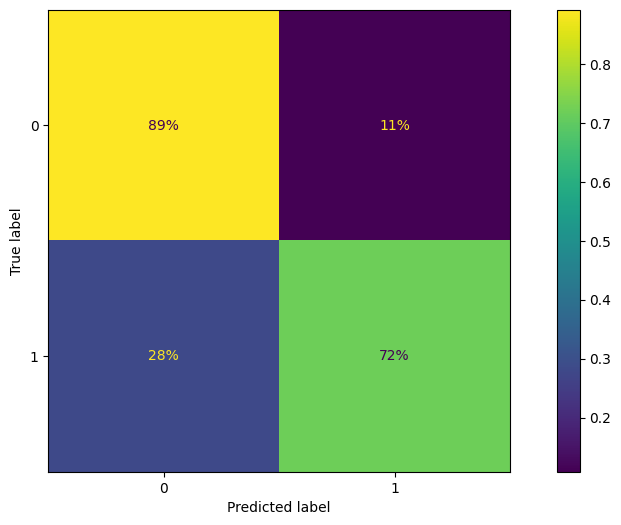

In [88]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(titanic_labels, titanic_labels_pred_gb, normalize="true", values_format=".0%")
plt.show()

- A lot of errors coming from predicting that they dont survive but they actually do 
    - Maybe need better feature engineering
        - Fare and Age can be made into categorical data with bins for different ranges
    - Hyper-parameter tuning required

# Fine Tuning the Model

In [108]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt  
from sklearn.pipeline import Pipeline
import sklearn

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("xgboost", GradientBoostingClassifier(random_state=42)),
])

param_distribs = {'xgboost__learning_rate': sp_randFloat(),
                'xgboost__subsample'    : sp_randFloat(),
                'xgboost__n_estimators' : sp_randInt(100, 1000),
                'xgboost__max_depth'    : sp_randInt(0, 10) 
                }

rnd_search = RandomizedSearchCV(full_pipeline, param_distributions = param_distribs, cv = 10, n_iter = 10, n_jobs=-1, scoring="neg_root_mean_squared_error", random_state=42)

In [109]:
rnd_search.fit(titanic, titanic_labels)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('cat',
                                                                               Pipeline(steps=[('ordinalencoder',
                                                                                                OrdinalEncoder()),
                                                                                               ('simpleimputer',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['Pclass',
                                                                                'Sex',
                                                                                'Embarked']),
                                                                              ('add',
                                                                               Pipeline(steps...
                   param_distributions={'xgboost__learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17ac00390>,
                                        'xgboost__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17ac02150>,
                                        'xgboost__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17ac03110>,
                                        'xgboost__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x17ac00a90>},
                   random_state=42, scoring='neg_root_mean_squared_error')

In [110]:
rnd_search.best_params_

{'xgboost__learning_rate': 0.056411579027100256,
 'xgboost__max_depth': 7,
 'xgboost__n_estimators': 591,
 'xgboost__subsample': 0.9385527090157502}

In [111]:
cv_res = pd.DataFrame(rnd_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgboost__learning_rate,param_xgboost__max_depth,param_xgboost__n_estimators,param_xgboost__subsample,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
3,1.199551,0.071084,0.012704,0.008376,0.056412,7,591,0.938553,{'xgboost__learning_rate': 0.05641157902710025...,-0.456435,...,-0.517306,-0.459639,-0.427900,-0.411113,-0.427900,-0.393611,-0.489323,-0.454395,0.037001,1
2,0.932246,0.039143,0.006930,0.002023,0.333709,7,763,0.650888,{'xgboost__learning_rate': 0.33370861113902184...,-0.390868,...,-0.530745,-0.459639,-0.444053,-0.411113,-0.474713,-0.375293,-0.503509,-0.455066,0.047392,2
8,0.542949,0.024036,0.004892,0.002371,0.170524,6,373,0.948886,{'xgboost__learning_rate': 0.17052412368729153...,-0.424918,...,-0.517306,-0.474713,-0.459639,-0.393611,-0.427900,-0.411113,-0.489323,-0.457376,0.038576,3
6,0.458895,0.037489,0.003741,0.001026,0.399861,2,975,0.514234,"{'xgboost__learning_rate': 0.3998609717152555,...",-0.408248,...,-0.569160,-0.474713,-0.459639,-0.444053,-0.474713,-0.427900,-0.556650,-0.471556,0.049583,4
7,0.277187,0.023588,0.003945,0.001384,0.592415,2,584,0.607545,"{'xgboost__learning_rate': 0.5924145688620425,...",-0.424918,...,-0.556650,-0.474713,-0.489323,-0.530745,-0.459639,-0.474713,-0.489323,-0.482792,0.038942,5


In [112]:
final_xgboost_model = rnd_search.best_estimator_
feature_importances = final_xgboost_model["xgboost"].feature_importances_

sorted(zip(feature_importances, final_xgboost_model["preprocessing"].get_feature_names_out()), reverse=True)

[(0.2697536382839143, 'iterative__Age'),
 (0.2593646696308869, 'log__Fare'),
 (0.1474015878520834, 'cat__Sex_0.0'),
 (0.13998219885539037, 'cat__Sex_1.0'),
 (0.08221745769666176, 'add__family_members'),
 (0.06051271473415435, 'cat__Pclass_2.0'),
 (0.01114685234109639, 'cat__Pclass_1.0'),
 (0.009883486506391011, 'cat__Embarked_0.0'),
 (0.007494439457545131, 'cat__Pclass_0.0'),
 (0.00738638943385546, 'cat__Embarked_2.0'),
 (0.004856565208021058, 'cat__Embarked_1.0')]

- Age makes sense, the younger you are the more likely they are to prioritise you
- Fare for the class that you are in, and as you can see later on the class also determines your worth, with the highest class being the one that survives
- Then comes the gender, family members, and where you embarked from. Embarked could describe the location of the passengers

# Evaluating the System

In [115]:
strat_test_set.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
398,0,2,"McKane, Mr. Peter David",male,46.0,0,0,28403,26.0000,NaN,S
198,0,3,"Olsen, Mr. Karl Siegwart Andreas",male,42.0,0,1,4579,8.4042,NaN,S
829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q


In [116]:
from sklearn.metrics import mean_squared_error, accuracy_score

X_test = strat_test_set.drop("Survived", axis=1)
y_test = strat_test_set["Survived"]

final_predictions = final_xgboost_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
final_rmse 

0.41615424729527806

In [118]:
final_accuracy = accuracy_score(y_test, final_predictions)
final_accuracy #Not bad

0.8268156424581006

# Submission Predictions

In [119]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
X = test

final_submission_predictions = final_xgboost_model.predict(X)
final_submission_predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [123]:
len(final_submission_predictions)

418

In [126]:
len(test.index)

418

In [132]:
gender_submission = pd.read_csv(Path("gender_submission.csv"))
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [133]:
submission_df = pd.DataFrame({
    "PassengerId": test.index,
    "Survived": final_submission_predictions
})

submission_df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


In [131]:
len(submission_df.axes[1])

2

In [136]:
submission_df.to_csv('titanic_submission.csv', index=False)

In [137]:
testing = pd.read_csv(Path('titanic_submission.csv'))
testing.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,1
4,896,1


- Submission achieved a total of 74% prediction accuracy